In [1]:
%load_ext autoreload

%autoreload 2

In [24]:
from missile_gym import MissileGym

In [25]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import figure, subplot2grid
from functional import seq
from ipywidgets import interact, interactive, fixed
import ipywidgets
from math import *
%config InlineBackend.figure_format = 'svg'

In [26]:
gym = MissileGym.make_simple_scenario((1000, 4000), (-200, 0))
done = False
reward = 0
obs = gym.reset()
state = gym.get_state()
history = [(state, obs, 0, done, {})]
alphas_targeting = [0]
while not done:
    obs, reward, done, info = gym.step_with_guidance()
    state = gym.get_state()
    history.append((state, obs, reward, done, info))
    alphas_targeting.append(gym.missile.alpha_targeting if abs(gym.missile.alpha_targeting) < gym.missile.alphamax else copysign(gym.missile.alphamax, gym.missile.alpha_targeting))
    
#     if gym.missile.alpha < 0:
#         print(gym.missile.alpha, gym.missile._get_dydt(gym.missile.t, gym.missile.state[:-1])[3])
print(info['done_reason'])

мы попали


In [27]:
%matplotlib inline

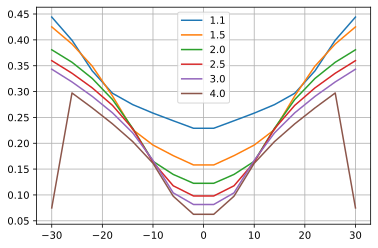

In [28]:
gym.missile.Cya_itr.plot2d()

In [29]:
gym.missile.Cya_itr.fs

array([[0.44416667, 0.42513333, 0.38083333, 0.3598    , 0.34326667,
        0.07486667],
       [0.39926923, 0.39196154, 0.35669231, 0.33542308, 0.31861538,
        0.29726923],
       [0.34004545, 0.34918182, 0.32536364, 0.30713636, 0.29063636,
        0.26836364],
       [0.29666667, 0.29144444, 0.28455556, 0.27327778, 0.25883333,
        0.2375    ],
       [0.27471429, 0.22635714, 0.22892857, 0.228     , 0.22      ,
        0.20314286],
       [0.2583    , 0.1965    , 0.165     , 0.1634    , 0.1669    ,
        0.1613    ],
       [0.2435    , 0.176     , 0.13966667, 0.11766667, 0.104     ,
        0.0975    ],
       [0.229     , 0.158     , 0.1225    , 0.098     , 0.0815    ,
        0.0625    ],
       [0.229     , 0.158     , 0.1225    , 0.098     , 0.0815    ,
        0.0625    ],
       [0.2435    , 0.176     , 0.13966667, 0.11766667, 0.104     ,
        0.0975    ],
       [0.2583    , 0.1965    , 0.165     , 0.1634    , 0.1669    ,
        0.1613    ],
       [0.27471429, 0

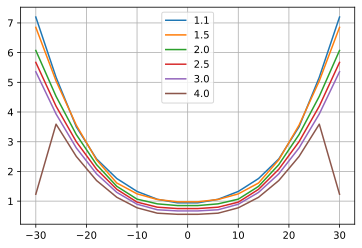

In [30]:
gym.missile.Cx_itr.plot2d()

In [31]:
def get_an_atau(vel0, vel1, tau):
    g = 9.81
    vel0 = np.array(vel0)
    vel1 = np.array(vel1)
    a = (vel1-vel0)/tau - np.array([0, -g])
    a_tau = np.dot(a, vel0/np.linalg.norm(vel0)) *  vel0/np.linalg.norm(vel0)
    a_n = a - a_tau
    return copysign(np.linalg.norm(a_n)/g, np.cross(vel0, a_n)), copysign(np.linalg.norm(a_tau)/g, np.dot(a_tau, vel0))
    

In [32]:
mis_xs = []
mis_ys = []
trg_xs = []
trg_ys = []
ts = []
mis_vs = []
trg_vs = []
rewards = []
alphas = []
trg_vels = []
mis_vels = []
Qs = []
for state, obs, reward, done, info in tqdm(history):
    gym.set_state(state)
    mis_smry = gym.missile.get_summary()
    trg_smry = gym.target.get_summary()
    mis_xs.append(mis_smry['x'])
    mis_ys.append(mis_smry['y'])
    trg_xs.append(trg_smry['x'])
    trg_ys.append(trg_smry['y'])
    ts.append(mis_smry['t'])
    mis_vs.append(mis_smry['v'])
    trg_vs.append(trg_smry['v'])
    rewards.append(reward)
    alphas.append(mis_smry['alpha'])
    Qs.append(mis_smry['Q'])
    
    trg_vels.append(gym.target.vel)
    mis_vels.append(gym.missile.vel)

trg_nys = [get_an_atau(v0, v1, t1-t0)[0] for v0, v1, t1, t0 in zip(trg_vels, trg_vels[1:], ts[1:], ts)]
trg_nys += [trg_nys[-1]]
mis_nys = [get_an_atau(v0, v1, t1-t0)[0] for v0, v1, t1, t0 in zip(mis_vels, mis_vels[1:], ts[1:], ts)]
mis_nys += [trg_nys[-1]]

trg_nxs = [get_an_atau(v0, v1, t1-t0)[1] for v0, v1, t1, t0 in zip(trg_vels, trg_vels[1:], ts[1:], ts)]
trg_nxs += [trg_nxs[-1]]
mis_nxs = [get_an_atau(v0, v1, t1-t0)[1] for v0, v1, t1, t0 in zip(mis_vels, mis_vels[1:], ts[1:], ts)]
mis_nxs += [trg_nxs[-1]]


In [33]:
@interact(i=ipywidgets.IntSlider(min=0,max=len(history)-1,step=1, value=len(history)-1))
def draw(i):
    f0 = figure(num = 0, figsize = (17, 7))
    ax01 = subplot2grid((4, 7), (0, 0), colspan=4, rowspan=4)
    ax02 = subplot2grid((4, 7), (0, 4), colspan=3, rowspan=1)
    ax03 = subplot2grid((4, 7), (1, 4), colspan=3, rowspan=1,sharex=ax02)
    ax04 = subplot2grid((4, 7), (2, 4), colspan=3, rowspan=1,sharex=ax02)
    ax05 = subplot2grid((4, 7), (3, 4), colspan=3, rowspan=1,sharex=ax02)
    f0.subplots_adjust(hspace=0)   
    f0.subplots_adjust(wspace=0.7)  
    
    state = history[i][0]
    gym.set_state(state)
    gym.render(fig=f0, ax=ax01)
    ax01.plot(mis_xs[:i], mis_ys[:i], ls=':')
    ax01.plot(trg_xs[:i], trg_ys[:i], ls=':')
    ax01.grid(True)
    
    ax02.plot(ts[:i], mis_vs[:i], label='Скорость ракеты')
    ax02.plot(ts[:i], trg_vs[:i], label='Скорость цели')
    ax02.legend()
    ax02.grid(True)
    
#     ax03.plot(ts[:i], rewards[:i], label='Награда_')
    ax03.plot(ts[:i], Qs[:i], label='Q')
    ax03.legend()
    ax03.grid(True)
    
    ax04.plot(ts[:i], alphas[:i], label=r'$\alpha_{текущий}$')
    ax04.plot(ts[:i], alphas_targeting[:i], label=r'$\alpha_{потребный}$', color='y', ls='-')
    ax04.legend()
    ax04.grid(True)
    
    ax05.plot(ts[:i], mis_nys[:i], label=r'$n_y$ ракеты', c='b')
    ax05.plot(ts[:i], trg_nys[:i], label=r'$n_y$ цели', c='orange')
    
    ax05.plot(ts[:i], mis_nxs[:i], label=r'$n_x$ ракеты', c='b', ls='--')
    ax05.plot(ts[:i], trg_nxs[:i], label=r'$n_x$ цели', c='orange', ls='--')
    ax05.legend()
    ax05.grid(True)
    
    plt.show()

interactive(children=(IntSlider(value=290, description='i', max=290), Output()), _dom_classes=('widget-interac…

In [8]:
a = np.array([1,1])
b = np.array([1,0])
np.cross(a,b)

array(-1)

In [137]:
gym.missile.Cya_itr.fs

array([[-11.231,  -9.028,  -6.653,  -4.828,  -3.524,  -2.389],
       [ -1.357,  -0.425,   0.425,   1.357,   2.389,   3.524],
       [  4.828,   6.653,   9.028,  11.231, -10.771,  -8.877],
       [ -6.849,  -4.739,  -2.864,  -1.775,  -0.951,  -0.282],
       [  0.282,   0.951,   1.775,   2.864,   4.739,   6.849],
       [  8.877,  10.771,  -9.686,  -8.109,  -6.411,  -4.661],
       [ -2.93 ,  -1.487,  -0.747,  -0.215,   0.215,   0.747],
       [  1.487,   2.93 ,   4.661,   6.411,   8.109,   9.686],
       [ -9.189,  -7.656,  -6.076,  -4.499,  -2.941,  -1.489],
       [ -0.626,  -0.17 ,   0.17 ,   0.626,   1.489,   2.941],
       [  4.499,   6.076,   7.656,   9.189,  -8.799,  -7.298],
       [ -5.768,  -4.275,  -2.851,  -1.537,  -0.553,  -0.14 ],
       [  0.14 ,   0.553,   1.537,   2.851,   4.275,   5.768],
       [  7.298,   8.799,  -1.881,  -6.848,  -5.356,  -3.945],
       [ -2.649,  -1.501,  -0.525,  -0.105,   0.105,   0.525],
       [  1.501,   2.649,   3.945,   5.356,   6.848,   

## Пробуем нормально создать аэродинамику

In [23]:
import pandas as pd

fp = 'constants/aerodynamic.csv'
df = pd.read_csv(fp)
df = df[df['D'] == 0]

In [50]:
df_mini = df[['M', 'A', 'Cy','Cya', 'Cxa', 'Cx']]
df_mini[52:57]

,M,A,Cy,Cya,Cxa,Cx
388,2.5,-14,-3.192,-2.941,1.398,0.645
389,2.5,-10,-1.634,-1.489,0.967,0.694
390,2.5,-6,-0.706,-0.626,0.797,0.727
391,2.5,-2,-0.196,-0.170,0.750,0.744
392,2.5,2,0.196,0.170,0.750,0.744


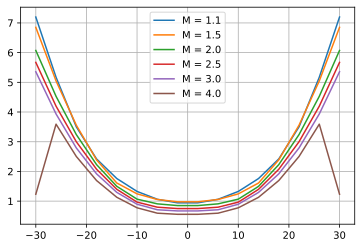

In [51]:
for M in np.unique(df_mini['M'].to_numpy()):
    alpha = df_mini[df_mini['M'] == M]['A'].to_numpy()
    cx = df_mini[df_mini['M'] == M]['Cxa'].to_numpy()
    plt.plot(alpha, cx, label=f'M = {M}')
plt.grid()
plt.legend()
plt.show()

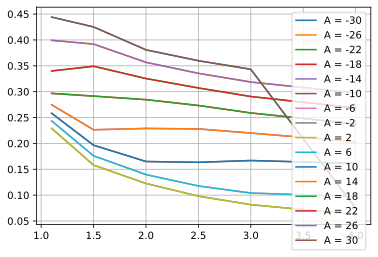

In [57]:
for alpha in np.unique(df_mini['A'].to_numpy()):
    M = df_mini[df_mini['A'] == alpha]['M'].to_numpy()
    cx = df_mini[df_mini['A'] == alpha]['Cy'].to_numpy()/alpha
    plt.plot(M, cx, label=f'A = {alpha}')
plt.grid()
plt.legend()
plt.show()